<a href="https://colab.research.google.com/github/edramos-lab/MLOPS/blob/main/MLFLOW_and_WANDB_on_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install mlflow
!pip install roboflow -q
!pip show mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
# prompt: create a thread and run a server with this command !mlflow server
'''
import threading

def start_mlflow_server():
  !mlflow server

t = threading.Thread(target=start_mlflow_server)
t.start()
'''

'''

!pip install Roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="wv1RWb130ECTfhxSNxPS")
project = rf.workspace("footdiseaseimgclass").project("things-jam67")
version = project.version(10)
dataset = version.download("folder")
'''
!kaggle datasets download -d mohammadamireshraghi/blood-cell-cancer-all-4class

Dataset URL: https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.67G/1.68G [00:19<00:00, 131MB/s]
100% 1.68G/1.68G [00:19<00:00, 90.9MB/s]


In [ ]:
import zipfile
import os
import shutil

# Path to the zip file
zip_file_path = 'blood-cell-cancer-all-4class.zip'
# Temporary extraction path
temp_extract_path = 'dataset/temp'
# Final extraction path
final_extract_path = 'dataset/train'

# Create the temporary directory if it doesn't exist
os.makedirs(temp_extract_path, exist_ok=True)

# Extract all files to the temporary directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(temp_extract_path)

# Rename the extracted main directory to 'train'
original_dir = os.path.join(temp_extract_path, 'Blood cell Cancer [ALL]')
shutil.move(original_dir, final_extract_path)

# Remove the temporary extraction path
os.rmdir(temp_extract_path)


In [ ]:
import os
import random
import shutil

# Paths
train_path = '/content/dataset/train'
test_path = 'dataset/test'

# Create the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# Loop through each subfolder in train_path
for subdir in os.listdir(train_path):
    subdir_path = os.path.join(train_path, subdir)
    if os.path.isdir(subdir_path):
        # Create corresponding subfolder in test_path
        test_subdir_path = os.path.join(test_path, subdir)
        os.makedirs(test_subdir_path, exist_ok=True)

        # List all image files in the current subfolder
        images = [f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Calculate 10% of the images to move
        num_to_move = max(1, len(images) // 10)

        # If there are fewer images than num_to_move, set num_to_move to the number of images
        if len(images) < num_to_move:
            num_to_move = len(images)

        # Randomly select 10% of the images
        images_to_move = random.sample(images, num_to_move)

        # Move selected images to the corresponding subfolder in test_path
        for image in images_to_move:
            src_image_path = os.path.join(subdir_path, image)
            dst_image_path = os.path.join(test_subdir_path, image)
            shutil.move(src_image_path, dst_image_path)

print("10% of the images have been moved to the test directory.")


10% of the images have been moved to the test directory.


In [ ]:
# prompt: count the total images contained in subfolders of train folder of  /content/things-10

import os

def count_images(path):
  total_images = 0
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.endswith(".jpg") or file.endswith(".png"):
        total_images += 1
  return total_images

test_path = "/content/dataset/test"
total_images = count_images(test_path)

print(f"Total images in test dataset folder: {total_images}")
train_path = "/content/dataset/train"
total_images = count_images(train_path)

print(f"Total images in train dataset folder: {total_images}")


Total images in test dataset folder: 322
Total images in train dataset folder: 2920


In [ ]:
!git clone https://github.com/edramos-lab/SMAP-Recognition.git

Cloning into 'SMAP-Recognition'...
remote: Enumerating objects: 8460, done.
remote: Counting objects: 100% (446/446), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 8460 (delta 155), reused 445 (delta 154), pack-reused 8014
Receiving objects: 100% (8460/8460), 90.11 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
!pip install timm
!pip install opencv-python
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
import timm

def get_num_params(model_name):
  model = timm.create_model(model_name, pretrained=True)
  return sum(p.numel() for p in model.parameters())

models =['efficientnet_b0', 'xception41', 'inception_v4','deit3_base_patch16_224', 'swin_tiny_patch4_window7_224','convnextv2_tiny',"vit_base_patch16_224","resnet50"]

for model in models:
  num_params = get_num_params(model)
  print(f'{model}: {num_params}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

efficientnet_b0: 5288548


model.safetensors:   0%|          | 0.00/108M [00:00<?, ?B/s]

xception41: 26969560


model.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

inception_v4: 42679816


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

deit3_base_patch16_224: 86585320


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

swin_tiny_patch4_window7_224: 28288354


model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

convnextv2_tiny: 28635496


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

vit_base_patch16_224: 86567656


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

resnet50: 25557032


In [ ]:
# prompt: create a loop for with 3 iterations, running a cmd terminal to run a python scrypt.py with two arguments with a list

models =['efficientnet_b0', 'xception41', 'inception_v4','deit3_base_patch16_224', 'swin_tiny_patch4_window7_224','convnextv2_tiny']
lrs=[0.00001,0.0001,0.001]
nsplitss=[2,4]
bss=[32,64]
dms=[1,2]
for model in models:
  for lr in lrs:
    for nsplits in nsplitss:
      for bs in bss:
        for dm in dms:
          !python SMAP-Recognition/train_wandb.py -dataset /content/dataset -subset_ratio 0.1 -n_splits {nsplits} -lr {lr} -batchsize {bs} -epochs 2 -dataset_multiplier {dm} -model {model} -project_name Blood-cell-Cancer-ALL


In [ ]:
models = ['convnextv2_tiny', 'deit3_base_patch16_224', 'swin_tiny_patch4_window7_224']
#bss= [64,128]
for i in range(1):
  for model in models:
    #for bs in bss:
    !python SMAP-Recognition/train_wandb.py -dataset /content/things-10 -subset_ratio 1 -n_splits 11 -lr 0.0001 -batchsize 64 -epochs 50 -dataset_multiplier 10 -model {model} -project_name footdiseaseimgclass-20240407

lr: 0.0001, type: <class 'float'>
batch_size: 64, type: <class 'int'>
epochs: 50, type: <class 'int'>
dataset_multiplier: 10, type: <class 'int'>
subset_ratio: 1.0, type: <class 'float'>
model: convnextv2_tiny, type: <class 'str'>
project_name: footdiseaseimgclass-20240407, type: <class 'str'>
dataset_folder: /content/things-10, type: <class 'str'>
wandb: Currently logged in as: edramos-us (aimfg-california). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /content/wandb/run-20240410_020059-a0t54kw0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run skilled-music-21
wandb: ⭐️ View project at https://wandb.ai/aimfg-california/footdiseaseimgclass-20240407
wandb: 🚀 View run at https://wandb.ai/aimfg-california/footdiseaseimgclass-20240407/runs/a0t54kw0
Class names:  ['Cavus-Foot-I', 'Cavus-Foot-II', 'Cavus-Foot-III', 'Flat-Foot-I', 'Flat-Foot-II', 'Flat-Foot-III', 'Flat-Foot-IV', 'Hindfoot-valgu

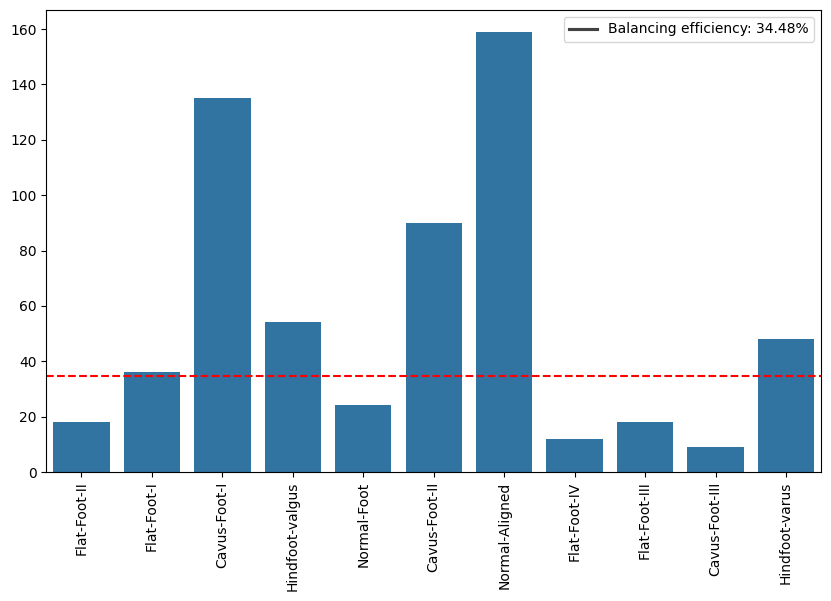

In [ ]:
# prompt: plot the distribution of my images contained within subfolders in /content/things-10/train. rotate 90 degrees the labels in x axis. add a horizontal line with balancing efficiency, adding this piece of code:     total_images = sum(class_counts)
#     max_images_in_a_class = max(class_counts)
#     balancing_efficiency = 100 * (total_images / (len(class_counts) * max_images_in_a_class))

import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

# Get a list of all the subfolders in the train directory
subfolders = [f for f in os.listdir('/content/things-10/train') if os.path.isdir(os.path.join('/content/things-10/train', f))]

# Count the number of images in each subfolder
class_counts = []
for subfolder in subfolders:
    class_counts.append(len(os.listdir(os.path.join('/content/things-10/train', subfolder))))

# Create a bar chart of the image counts
plt.figure(figsize=(10, 6))
sns.barplot(x=subfolders, y=class_counts)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add a horizontal line with the balancing efficiency
total_images = sum(class_counts)
max_images_in_a_class = max(class_counts)
balancing_efficiency = 100 * (total_images / (len(class_counts) * max_images_in_a_class))
plt.axhline(y=balancing_efficiency, color='red', linestyle='dashed')

# Add a legend
plt.legend(['Balancing efficiency: {:.2f}%'.format(balancing_efficiency)])

# Show the plot
plt.show()


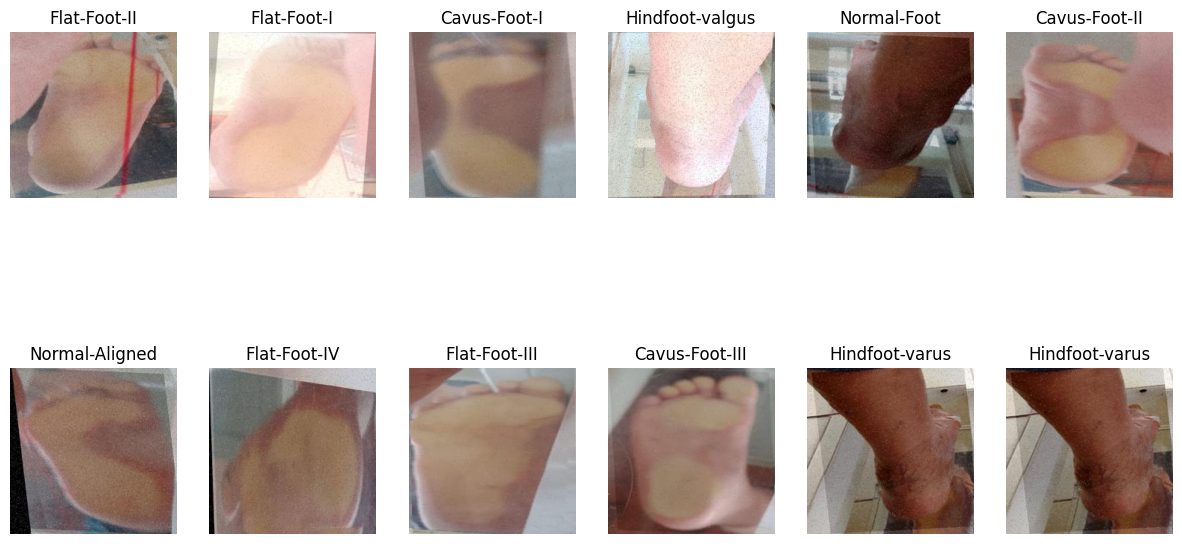

In [ ]:
from torchvision.transforms import Compose, Resize, RandomHorizontalFlip, RandomVerticalFlip, RandomRotation, ColorJitter, ToTensor, Normalize

image_size=(224,224)
data_transforms = Compose([
    Resize(image_size),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    RandomRotation(45),
    ColorJitter(brightness=0.01, contrast=0.01, saturation=0.01),  # Reduced effect
    ToTensor(),
    # Updated Normalize values (example only; calculate based on your dataset)
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# prompt: plot one image per subfolder, showing the label on the top of each image, in a two row, six column layout

# prompt: plot one image per subfolder, showing the label on the top of each image, in a two row layout, there are 11 subfolders, ensure plot all the images (11)

import matplotlib.pyplot as plt
import os

def plot_images_with_labels(use_transforms=False):
    # Get a list of all the subfolders in the train directory
    subfolders = [f for f in os.listdir('/content/things-10/train') if os.path.isdir(os.path.join('/content/things-10/train', f))]

    # Plot one image per subfolder
    fig, axes = plt.subplots(2, 6, figsize=(15, 8))
    for i, subfolder in enumerate(subfolders):
        # Get the path to the first image in the subfolder
        image_path = os.path.join('/content/things-10/train', subfolder, os.listdir(os.path.join('/content/things-10/train', subfolder))[0])

        # Load the image
        image = plt.imread(image_path)

        # Apply data_transforms if use_transforms is True
        if use_transforms:
            image = data_transforms(image)

        # Plot the image
        axes[i // 6, i % 6].imshow(image)
        axes[i // 6, i % 6].set_title(subfolder)
        axes[i // 6, i % 6].axis('off')

    # Show the plot

    axes[1,5].imshow(image)
    axes[1, 5].set_title(subfolder)
    axes[1,5].axis('off')
    plt.show()


# Call the function without using data_transforms
plot_images_with_labels(use_transforms=False)

# Call the function using data_transforms
#plot_images_with_labels(use_transforms=True)


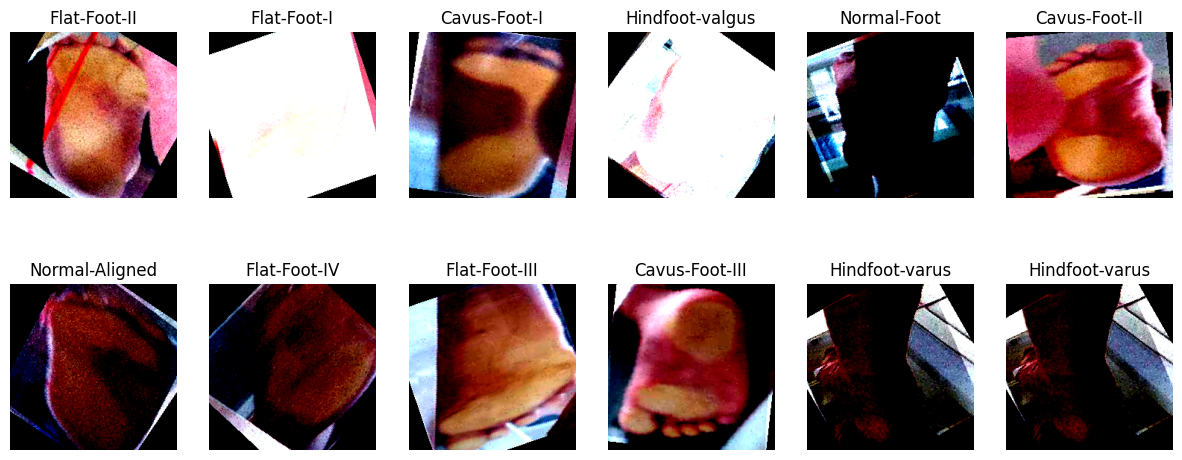

In [ ]:
from torchvision.transforms import Compose, Resize, RandomHorizontalFlip, RandomVerticalFlip, RandomRotation, ColorJitter, ToTensor, Normalize

image_size=(224,224)
data_transforms = Compose([
    Resize(image_size),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    RandomRotation(45),
    ColorJitter(brightness=0.01, contrast=0.01, saturation=0.01),  # Reduced effect
    ToTensor(),
    # Updated Normalize values (example only; calculate based on your dataset)
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# prompt: plot one image per subfolder, showing the label on the top of each image, in a two row, six column layout

import matplotlib.pyplot as plt
import os

from torchvision.transforms import functional as F
# Get a list of all the subfolders in the train directory
subfolders = [f for f in os.listdir('/content/things-10/train') if os.path.isdir(os.path.join('/content/things-10/train', f))]

# Create a figure with two rows and six columns
fig, axs = plt.subplots(2, 6, figsize=(15, 6))

# Iterate over the subfolders and plot one image per subfolder
for i, subfolder in enumerate(subfolders):
    # Get the first image in the subfolder
    image_path = os.path.join('/content/things-10/train', subfolder, os.listdir(os.path.join('/content/things-10/train', subfolder))[0])

    # Read the image
    image = plt.imread(image_path)
    # Convert the image to a PIL Image
    #image = Image.fromarray(image)
    # Get the label from the subfolder name
    label = subfolder

    # Apply data transformations to the image
    transformed_image = data_transforms(F.to_pil_image(image))

    # Plot the transformed image
    axs[i // 6, i % 6].imshow(transformed_image.permute(1, 2, 0))
    axs[i // 6, i % 6].set_title(label)
    axs[i // 6, i % 6].axis('off')
axs[1,5].imshow(transformed_image.permute(1, 2, 0))
axs[1, 5].set_title(subfolder)
axs[1,5].axis('off')

# Show the plot
plt.show()
